In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns

In [ ]:
data = pd.read_csv('salaries.csv')
data.head()

In [40]:
le = LabelEncoder()
col = ['company','job','degree']
for i in col:
    data[i] = le.fit_transform(data[i])
data.dtypes

company                  int32
job                      int32
degree                   int32
salary_more_then_100k    int64
dtype: object

In [41]:
Y = data['salary_more_then_100k']
X = data.drop('salary_more_then_100k',axis =1)


In [42]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state=42)
X_test.shape

(4, 3)

In [43]:
model = DecisionTreeClassifier()
model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [45]:
Y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_pred,Y_test)
accuracy

0.75

In [46]:
cm = confusion_matrix(Y_test,Y_pred)
cm

array([[2, 0],
       [1, 1]], dtype=int64)

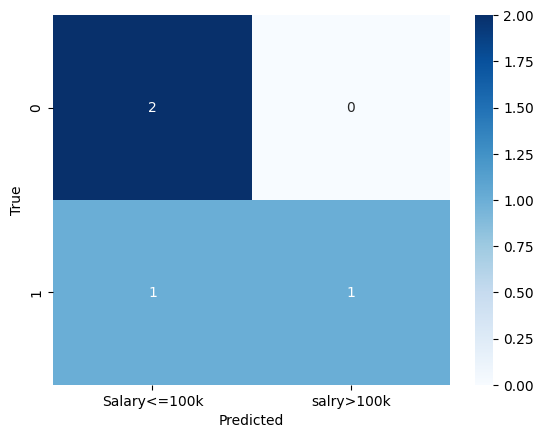

In [53]:
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels = ['Salary<=100k','salry>100k'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

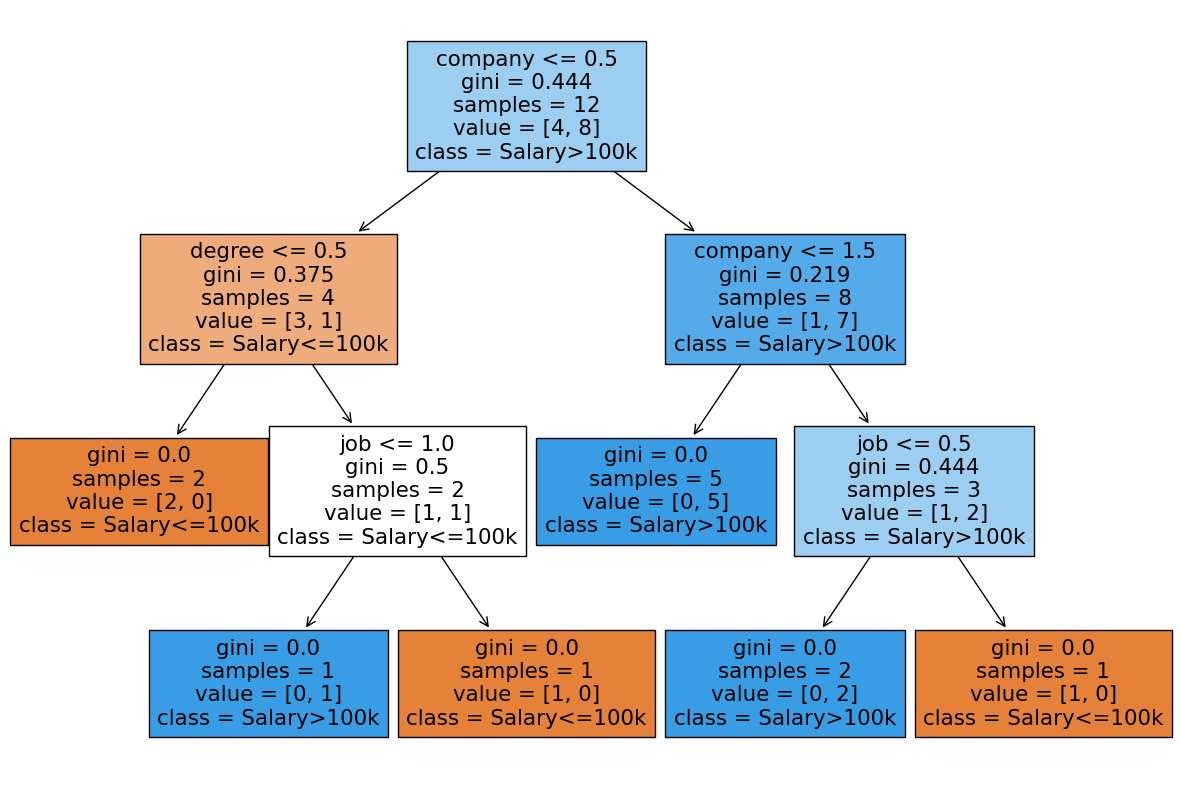

In [59]:
plt.figure(figsize=(15,10))
plot_tree(model,filled=True,feature_names=list(X.columns),class_names=["Salary<=100k","Salary>100k"])
plt.show()
